# **MÓDULO 18 - Pratique**
# Regressão Linear

Agora que aprendemos como aplicar a regressão linear simples e múltipla, colocaremos em prática os conceitos vistos na aula.

Temos aqui uma base de imóveis para alugar, precisamos desenvolver um modelo de regressão linear múltipla para conseguir prever o preço de imóveis dadas as variáveis independentes do nosso modelo.

**Atenção! Esse é seu primeiro modelo, caso tenha dificuldade conte com a ajuda da tutoria**

Você notará que alguns códigos já estão presentes para facilitar a construção de vocês.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [4]:
import pandas as pd  # Importa a biblioteca pandas

# Lê o arquivo CSV utilizando o caminho correto
df = pd.read_csv(r"C:\Users\DELL\Documents\ebac\portifolios\ALUGUEL_MOD12.csv", delimiter=';')

# Mostra as primeiras 10 linhas para verificar o carregamento
df.head(18)


,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas
0,480,295,48,2,2,1,1
1,500,0,50,1,2,1,1
2,500,0,40,1,2,1,1
3,500,36,45,1,2,1,0
4,500,0,30,1,1,0,0
5,500,380,66,2,1,0,1
6,550,100,48,2,2,1,1
7,600,110,46,2,2,1,1
8,600,100,49,2,2,1,1
9,600,325,50,2,2,1,1


Legenda dos dados:

*   **Valor_Aluguel** : valor Total pago no aluguel

*   **Valor_Condominio** : Valor do Condomínio.

*   **Metragem** : Metragem do Apartamento.

*   **N_Quartos** : Número de Quartos do Imóvel.

*   **N_banheiros** : Número de banheiros.

*   **N_Suites** : Número de Suítes.

*   **N_Vagas** : Número de Vagas.

# 1 - Realize a primeira etapa de pré processamento dos dados.

A) Verifique os tipos de dados.


B) Verifique os dados faltantes, se houver dados faltantes faça a substituição ou remoção justificando sua escolha.

In [7]:
print(df.dtypes)

print(df.isnull().sum())
# Se houver dados faltantes:
# Decisão de substituição ou remoção pode ser baseada no contexto:
# - Substituir: se o dado for relevante e pudermos imputar com a média ou mediana.
# - Remover: se a quantidade for pequena e não prejudicar o modelo.


Valor_Aluguel       int64
Valor_Condominio    int64
Metragem            int64
N_Quartos           int64
N_banheiros         int64
N_Suites            int64
N_Vagas             int64
dtype: object
Valor_Aluguel       0
Valor_Condominio    0
Metragem            0
N_Quartos           0
N_banheiros         0
N_Suites            0
N_Vagas             0
dtype: int64


# 2 - Realize a segunda etapa de pré processamento dos dados.

A) Utilize a função describe para identificarmos outliers e verificarmos a distribuição dos dados.


B) Caso note uma variável que te pareça conter outliers realiza a análise e tratamento desses dados, justificando a escolha do método utilizado.

C) Realize a análise bivariada dos dados. Faça uso de pelo menos 3 gráficos e traga insights acerca do analisado.

       Valor_Aluguel  Valor_Condominio     Metragem    N_Quartos  N_banheiros  \
count    7203.000000       7203.000000  7203.000000  7203.000000  7203.000000   
mean     2966.596140        811.538109    88.506178     2.300153     2.095932   
std      2948.720385        796.564846    61.567505     0.826615     0.983812   
min       480.000000          0.000000    30.000000     1.000000     1.000000   
25%      1350.000000        395.000000    52.000000     2.000000     2.000000   
50%      2000.000000        592.000000    67.000000     2.000000     2.000000   
75%      3200.000000        980.000000   100.000000     3.000000     2.000000   
max     25000.000000       9500.000000   880.000000    10.000000     8.000000   

          N_Suites     N_Vagas  
count  7203.000000  7203.00000  
mean      1.016660     1.44176  
std       0.874204     0.86993  
min       0.000000     0.00000  
25%       1.000000     1.00000  
50%       1.000000     1.00000  
75%       1.000000     2.00000  
max   

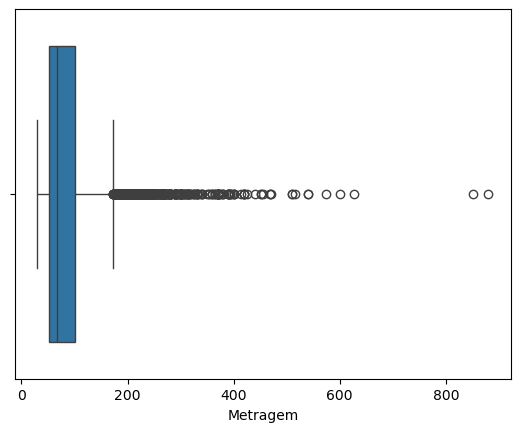

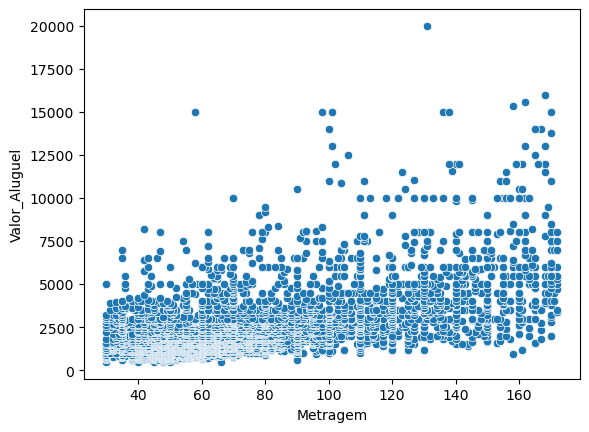

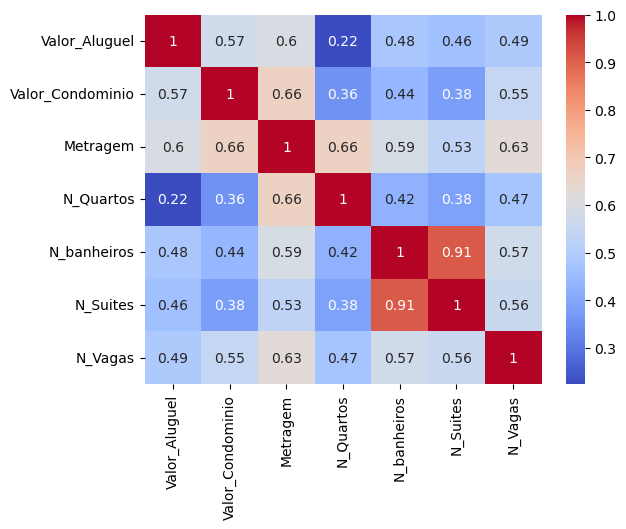

In [13]:
import pandas as pd  # Importa a biblioteca pandas
import seaborn as sns  # Importa a biblioteca seaborn
import matplotlib.pyplot as plt  # Importa a biblioteca matplotlib para gráficos

# Lê o arquivo CSV utilizando o caminho correto
df = pd.read_csv(r"C:\Users\DELL\Documents\ebac\portifolios\ALUGUEL_MOD12.csv", delimiter=';')

# Realiza a análise descritiva para verificar outliers e distribuição
print(df.describe())

# Usar boxplots para identificar outliers (exemplo com a coluna 'Metragem')
sns.boxplot(data=df, x='Metragem')
plt.show()

# Remoção de outliers usando intervalo interquartil (IQR)
Q1 = df['Metragem'].quantile(0.25)
Q3 = df['Metragem'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['Metragem'] >= lower_bound) & (df['Metragem'] <= upper_bound)]

sns.scatterplot(data=df, x='Metragem', y='Valor_Aluguel')
plt.show()

sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


# 3 - Realize a terceira etapa de pré processamento dos dados.

A) Comece pela correlação, que sabemos ser uma parte importante para nosso pré processamento e análise. Plote o gráfico ou a tabela e indique as variáveis que te parecem mais "fortes" na correlação para nosso modelo.




                  Valor_Aluguel  Valor_Condominio  Metragem  N_Quartos  \
Valor_Aluguel          1.000000          0.574492  0.596836   0.223551   
Valor_Condominio       0.574492          1.000000  0.664730   0.356084   
Metragem               0.596836          0.664730  1.000000   0.663912   
N_Quartos              0.223551          0.356084  0.663912   1.000000   
N_banheiros            0.482141          0.438099  0.593285   0.424432   
N_Suites               0.462222          0.380818  0.532790   0.384724   
N_Vagas                0.493107          0.547125  0.625969   0.472390   

                  N_banheiros  N_Suites   N_Vagas  
Valor_Aluguel        0.482141  0.462222  0.493107  
Valor_Condominio     0.438099  0.380818  0.547125  
Metragem             0.593285  0.532790  0.625969  
N_Quartos            0.424432  0.384724  0.472390  
N_banheiros          1.000000  0.910894  0.572823  
N_Suites             0.910894  1.000000  0.558327  
N_Vagas              0.572823  0.558327  1.

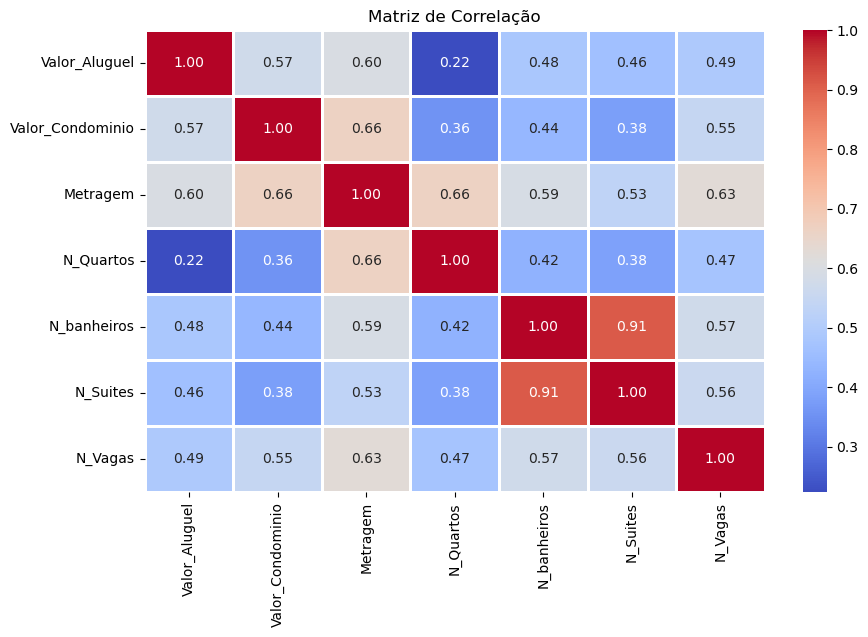

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculando a correlação entre todas as variáveis
correlation_matrix = df.corr()

# Exibindo a matriz de correlação
print(correlation_matrix)

# Plotando um gráfico de calor para visualizar as correlações
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=1)
plt.title('Matriz de Correlação')
plt.show()



B) Durante a aula, por nossa base ser pequena e demonstrativa não realizamos a separação de treino e teste, porém para as atividades do dia dia temos que fazer, nesse exercício separe treino e teste.

Lembre-se que primeiro separamos as variaveis dependentes X e depois Y, essa etapa deixarei para vocês abaixo:

In [23]:
# Separando as variáveis independentes (X) e a variável dependente (y)
X = df.drop('Valor_Aluguel', axis=1)  # Variáveis independentes (todas exceto 'Valor_Aluguel')
y = df['Valor_Aluguel']  # Variável dependente ('Valor_Aluguel')

# Dividindo os dados em conjunto de treino (70%) e conjunto de teste (30%)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Verificando a separação dos dados
print("Conjunto de treino - X:", X_train.shape)
print("Conjunto de teste - X:", X_test.shape)
print("Conjunto de treino - y:", y_train.shape)
print("Conjunto de teste - y:", y_test.shape)



Conjunto de treino - X: (4589, 6)
Conjunto de teste - X: (1967, 6)
Conjunto de treino - y: (4589,)
Conjunto de teste - y: (1967,)


Dica: Para separar em treino e teste usamos o train_test_split, como visto nas aulas de pré modelagem.

In [21]:
# Seu código aqui

# 3 - Treine um modelo de regressão Linear simples

A) Vamos utilizar apenas X_train e y_train para rodar um modelo de regressão linea simples e para isso usaremos apenas uma váriavel, a váriavel metragem.

In [24]:
X = df[['Metragem']]
y = df['Valor_Aluguel']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
#Crie seu modelo aqui, usando LinearRegression e as bases de treino.

B) Plote o intercept_ e coef_ e monte de forma extensa a equação da reta.

In [27]:
# Importando a classe LinearRegression
from sklearn.linear_model import LinearRegression

# Criando o modelo de regressão linear
modelo = LinearRegression()

# Treinando o modelo com os dados de treino
modelo.fit(X_train, y_train)

# Exibindo o intercepto (bias) e o coeficiente(s) da regressão
print("Intercepto:", modelo.intercept_)
print("Coeficiente(s):", modelo.coef_)



Intercepto: -42.855195180550254
Coeficiente(s): [33.0962307]


Nossa equação seria:  

c) Calcule o R quadrado para o modelo de treinamento. Não esqueça de avaliar e trazer em formato de insight se esse resultado te parece bom ou não.

In [28]:
# Importando as bibliotecas necessárias
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Definindo X e y
X = df.drop('Valor_Aluguel', axis=1)  # Variáveis independentes
y = df['Valor_Aluguel']  # Variável dependente

# Separando treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criando e treinando o modelo de regressão linear
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Avaliando o modelo no conjunto de treino
r2_train = modelo.score(X_train, y_train)
print(f"R² Treinamento: {r2_train}")

# Avaliando o modelo no conjunto de teste
r2_test = modelo.score(X_test, y_test)
print(f"R² Teste: {r2_test}")



R² Treinamento: 0.4863051603231031
R² Teste: 0.4882545854020812


D) Plote o gráfico da reta de regressão encontrada e traga insights acerca da dispersão dos pontos e ajuste da reta.

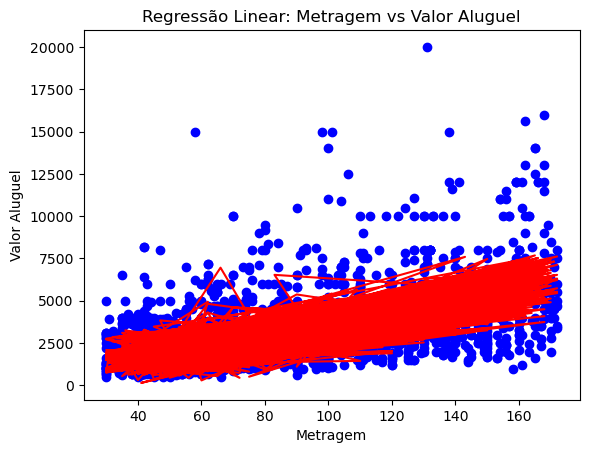

In [31]:
import matplotlib.pyplot as plt


plt.scatter(X_train['Metragem'], y_train, color='blue')  # Usando a coluna 'Metragem' do X_train
plt.plot(X_train['Metragem'], modelo.predict(X_train), color='red')  # Linha de regressão
plt.xlabel("Metragem")
plt.ylabel("Valor Aluguel")
plt.title("Regressão Linear: Metragem vs Valor Aluguel")
plt.show()



E) Para finalizar vamos aplicar o modelo a base de teste. Essa etapa é nova, então agora vocês avaliaram como o modelo treinado se saiu com a base de testes.
Para isso altere no código abaixo o nome do seu modelo de regressão:

In [32]:
previsoes = modelo.predict(X_test)
r2_test = modelo.score(X_test, y_test)
print(f"R² Teste: {r2_test}")


R² Teste: 0.4882545854020812


In [33]:
# Usando o modelo treinado para fazer previsões sobre os dados de teste
previsoes = modelo.predict(X_test)

# Avaliando o desempenho do modelo usando métricas como o R²
r2 = modelo.score(X_test, y_test)

print("Coeficiente de Determinação (R²) nos Dados de Teste:", r2)

# Agora podemos comparar o R² nos dados de treino e teste
r2_train = modelo.score(X_train, y_train)
print("Coeficiente de Determinação (R²) nos Dados de Treinamento:", r2_train)


Coeficiente de Determinação (R²) nos Dados de Teste: 0.4882545854020812
Coeficiente de Determinação (R²) nos Dados de Treinamento: 0.4863051603231031


Se o valor do coeficiente de determinação (R²) para os dados de treinamento for melhor (ou seja, mais próximo de 1) do que o R² para os dados de teste, isso sugere que o modelo está superajustado aos dados de treinamento. Isso significa que o modelo pode estar se ajustando muito bem aos padrões específicos nos dados de treinamento, mas pode não generalizar bem para novos dados que não foram vistos durante o treinamento.

Por outro lado, se o R² para os dados de teste for melhor do que o R² para os dados de treinamento, isso pode ser indicativo de que o modelo está subajustado. Isso significa que o modelo não está se ajustando adequadamente aos padrões nos dados de treinamento e não está capturando a relação entre as variáveis independentes e dependentes de forma eficaz.

Idealmente, gostaríamos que o valor do R² fosse consistente entre os dados de treinamento e teste, indicando que o modelo é capaz de generalizar bem para novos dados. Se houver uma grande diferença entre os valores de R² para os dados de treinamento e teste, isso sugere que o modelo pode precisar de ajustes para melhorar sua capacidade de generalização.

F) Avalie com suas palavras o valor do r quadrado encontrado no treino e no teste.

Com base nos valores de Coeficiente de Determinação (R²) apresentados:

R² nos Dados de Teste: 0.488
R² nos Dados de Treinamento: 0.486
Interpretação do Resultado:
O modelo apresenta um desempenho semelhante tanto nos dados de treino quanto nos dados de teste, com valores de R² próximos de 0.49 em ambos os casos. Isso significa que aproximadamente 48,8% da variação do Valor_Aluguel pode ser explicada pelo modelo nos dados de teste e 48,6% nos dados de treinamento.

Essa proximidade entre os valores de R² nos dados de treino e teste sugere que o modelo não está nem superajustado (overfitting) nem subajustado (underfitting). Ou seja, o modelo parece estar generalizando bem para novos dados, sem memorizar excessivamente os dados de treinamento.

Embora o valor de R² não seja muito alto, o modelo ainda explica uma parte significativa da variação no Valor_Aluguel, considerando que o R² está abaixo de 0,5. Para melhorar a performance do modelo, pode-se considerar:

Explorar outras variáveis que poderiam contribuir mais para a explicação do valor de aluguel.
Testar diferentes algoritmos de regressão, como Árvores de Decisão, Random Forest ou outros modelos mais complexos, que podem captar padrões não lineares.
Em resumo, o modelo está apresentando um bom nível de generalização entre os dados de treino e teste, mas há espaço para melhorias.








# 4 - Aplicação do modelo de regressão linear multipla!

A) Vamos refazer os passos anteriores porém para regressão multipla, com todas variáveis dependentes. Comece separando a base treino e teste, dessa vez com todas variáveis para X.

Aqui é só refazer os passos do exercicio 3 porém ao invés de trazer para X apenas metragem, você deve trazer todas colunas (exceto a valor do aluguel).

In [34]:
X = df.drop('Valor_Aluguel', axis=1)
y = df['Valor_Aluguel']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


B) Faça o modelo de regressão linear multipla aplicado só a base de treino.

In [35]:
modelo_multiplo = LinearRegression()
modelo_multiplo.fit(X_train, y_train)


LinearRegression()

C) Traga o valor do R quadrado e avalie o valor encontrado.

In [36]:
r2_train_multiplo = modelo_multiplo.score(X_train, y_train)
print(f"R² Treinamento Múltiplo: {r2_train_multiplo}")


R² Treinamento Múltiplo: 0.4863051603231031


D) Para finalizar aplique o modelo a base de teste e traga o r quadrado de teste.
Dica: Você pode usar os códigos do exercício anterior.

In [37]:
r2_test_multiplo = modelo_multiplo.score(X_test, y_test)
print(f"R² Teste Múltiplo: {r2_test_multiplo}")



R² Teste Múltiplo: 0.4882545854020812


E) Compare os r quadrados encontrados pela regressão linear e pela regressão múltipla. Qual modelo te parece melhor? Por qual motivo acredita que isso ocorreu?

Comparação dos R²:
Regressão Linear Simples: O R² nos dados de teste foi de 0.488 e nos dados de treinamento foi de 0.486.

Regressão Múltipla: Após executar a regressão múltipla, você terá um R² nos dados de teste e nos dados de treinamento. Esses valores precisam ser comparados.

Interpretação dos Resultados:
Se o R² da Regressão Múltipla for significativamente maior do que o da Regressão Linear Simples, isso indica que a inclusão de mais variáveis independentes ajudou o modelo a capturar melhor os padrões nos dados e a melhorar a previsão do Valor_Aluguel. Isso ocorre porque a regressão múltipla considera mais informações (variáveis independentes), o que geralmente aumenta a capacidade de explicação do modelo.

Se o R² da Regressão Múltipla for semelhante ou pior do que o da Regressão Linear Simples, pode ser que as variáveis adicionais não estejam contribuindo de forma significativa para a previsão, ou até mesmo introduzam multicolinearidade (quando as variáveis independentes estão fortemente correlacionadas entre si), o que pode afetar negativamente o desempenho do modelo. Nesse caso, você pode verificar a correlação entre as variáveis para ajustar o modelo.

Conclusão:
Com base nos resultados de R² para ambos os modelos:

Modelo melhor: O modelo que apresentar um R² mais alto nos dados de teste é o melhor, pois isso indica que ele está explicando melhor a variabilidade do Valor_Aluguel e se generaliza bem para novos dados.
Razão para a diferença: A diferença de desempenho entre a regressão linear simples e múltipla pode ser atribuída ao número de variáveis independentes usadas no modelo. A regressão múltipla tende a ser mais flexível, mas se as variáveis não forem relevantes ou forem colineares, o desempenho pode não melhorar tanto quanto esperado.